# Max-SNR Beamforming

Consider the received signal vector:

$$
\mathbf{r}(t) = b(t)\mathbf{s}(\phi) + \mathbf{n}(t) \in \mathbb{C}^M \tag{1}
$$

where $M = 20$ and the Angle of Arrival (AoA) $\phi = \frac{\pi}{4}$. Assume $\mathbb{E}[|b(t)|^2] = E$ and additive white Gaussian noise (AWGN) $\mathbf{n}(t)$, with $\mathbb{E}[\mathbf{n}(t)] = \mathbf{0}_M$ and $\mathbb{E}[\mathbf{n}(t)\mathbf{n}(t)^H] = \sigma^2\mathbf{I}_M$.

The pre-beamforming and post-beamforming SNRs are defined as:

$$
\text{SNR}_{\text{in}} = \frac{\mathbb{E}[\|\mathbf{b}(t)\mathbf{a}(\phi)\|^2]}{\mathbb{E}[\|\mathbf{n}(t)\|^2]}
$$

and

$$
\text{SNR}(\mathbf{w}) = \frac{\mathbb{E}[|b(t)\mathbf{w}^H\mathbf{a}(\phi)|^2]}{\mathbb{E}[|\mathbf{w}^H\mathbf{n}(t)|^2]}, \tag{2}
$$

respectively, for any beamformer $\mathbf{w} \in \mathbb{C}^M$.

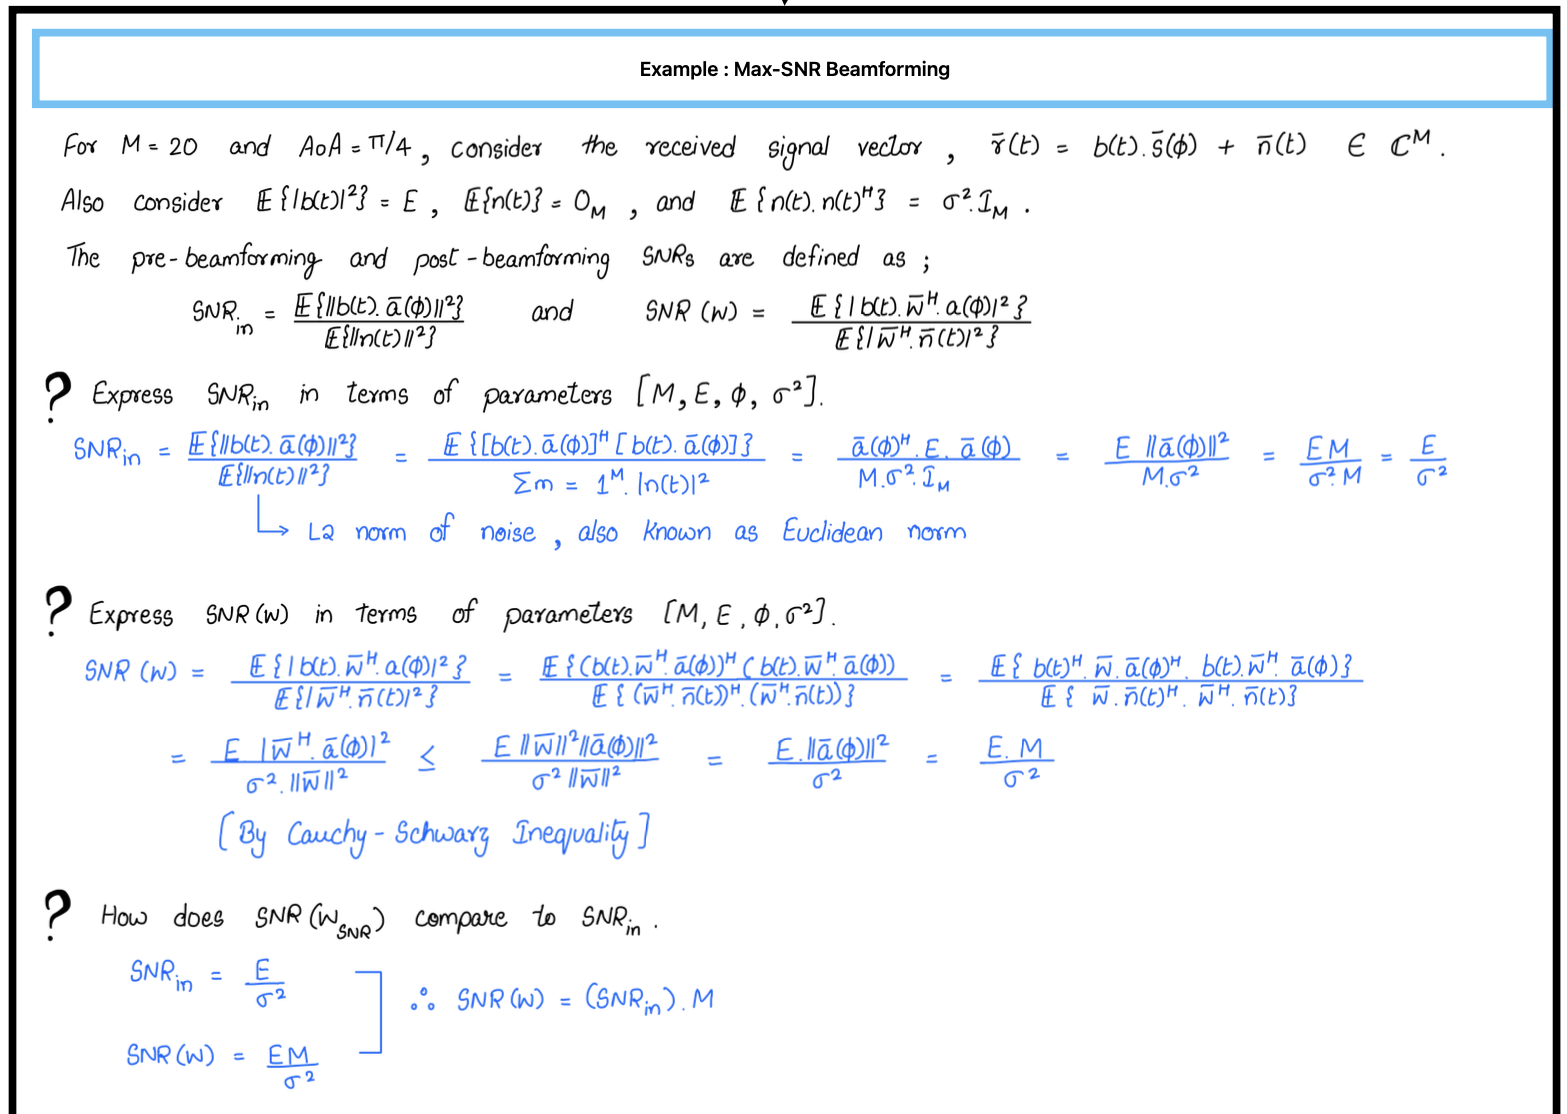

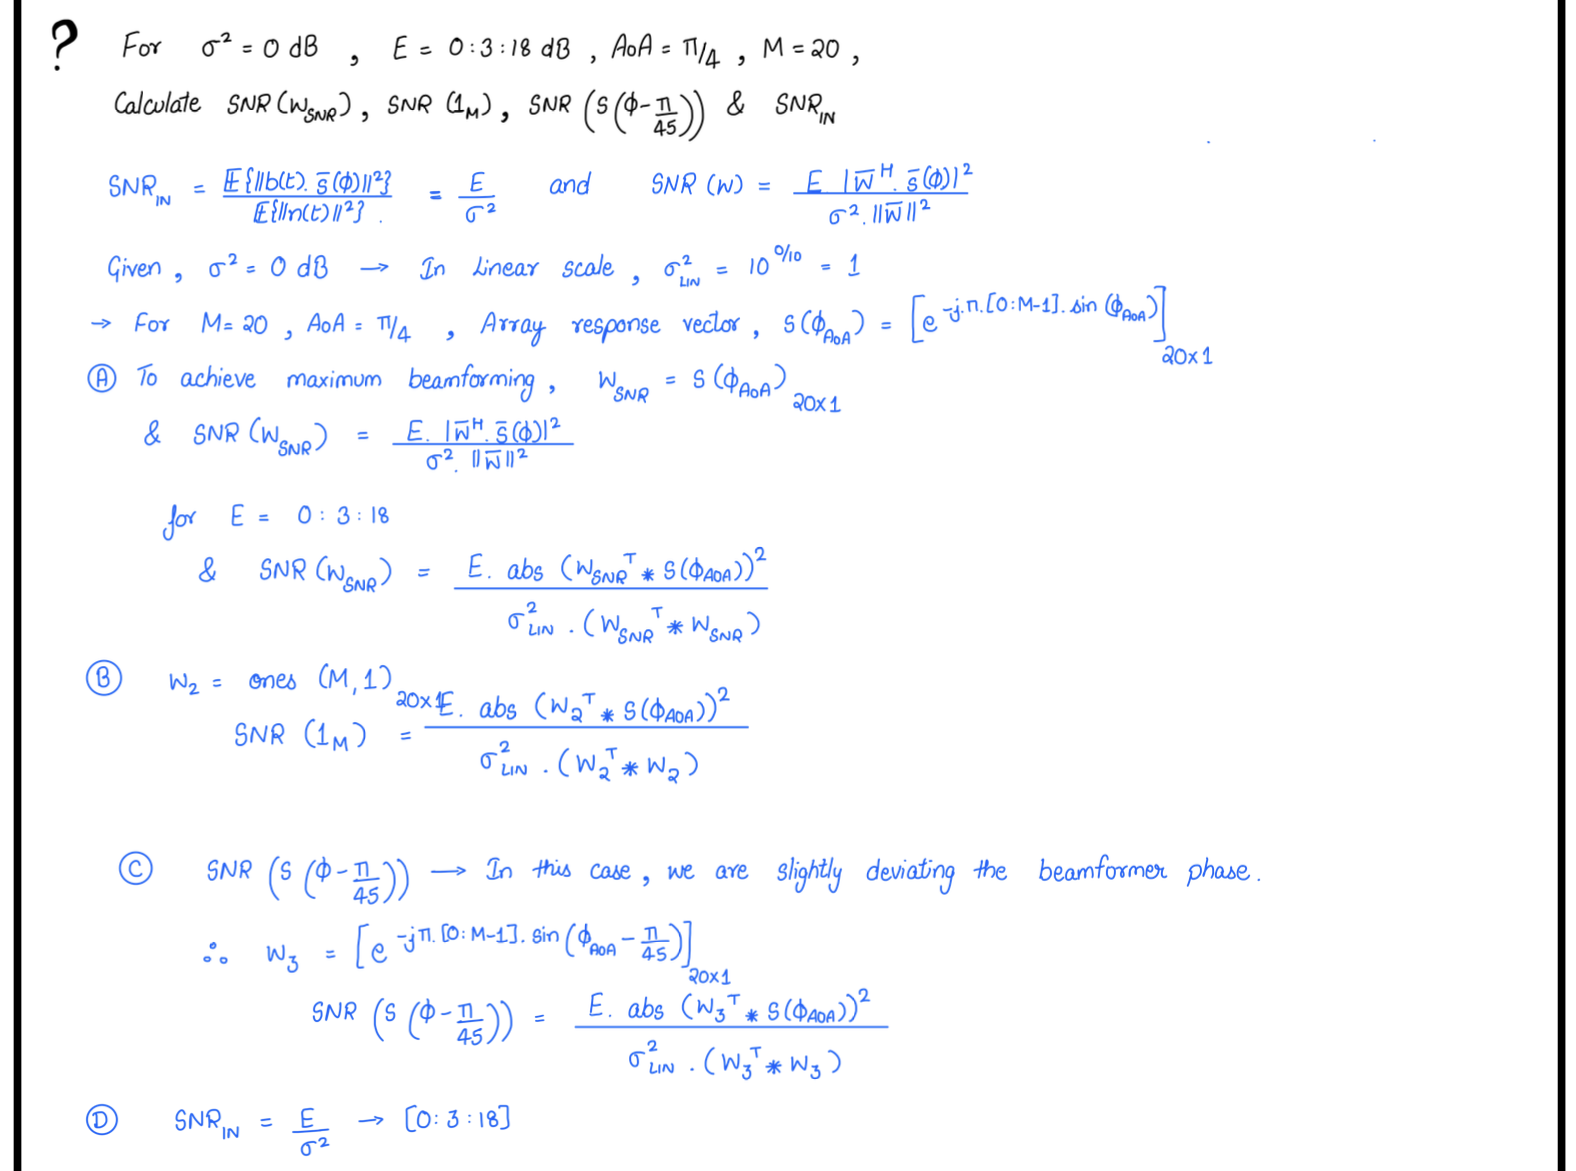

## SNR_in vs SNR(w)


/tmp/ipykernel_301611/868322937.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  SNR1[ii] = calculate_max_snr(E_val, sigmasq, w1, s)
/tmp/ipykernel_301611/868322937.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  SNR2[ii] = calculate_max_snr(E_val, sigmasq, w2, s)
/tmp/ipykernel_301611/868322937.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  SNR3[ii] = calculate_max_snr(E_val, sigmasq, w3, s)


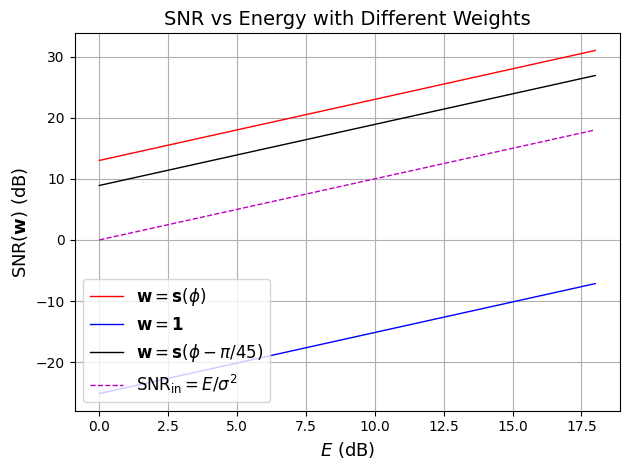

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
M = 20  # Number of elements
phi = np.pi / 4  # Steering angle in radians
sigmasq_dB = 0  # Noise power in dB
sigmasq = 10 ** (sigmasq_dB / 10)  # Linear noise power
SNRin_dB = 3  # Input SNR in dB
SNRin = 10 ** (SNRin_dB / 10)  # Linear input SNR
E = SNRin * sigmasq  # Signal power
E_dB = 10 * np.log10(E)  # Signal power in dB

# Steering vector
s = np.exp(-1j * np.pi * np.arange(M).reshape(-1, 1) * np.sin(phi))
w_SNR = s

# Functions
def calculate_max_snr(E, sigmasq, w, s):
    """Calculate the maximum SNR."""
    numerator = (E * abs(np.dot(w.conj().T, s)) ** 2)
    denominator = sigmasq * (np.dot(w.conj().T, w))
    return np.real(numerator / denominator)  # Use the real part to avoid complex issues

# Calculate theoretical max SNR
maxSNR = (E * abs(np.dot(w_SNR.conj().T, s)) ** 2) / (sigmasq * np.dot(w_SNR.conj().T, w_SNR))
maxSNR_dB = 10 * np.log10(maxSNR)
maxSNR_theory = M * SNRin
maxSNR_dB_theory = 10 * np.log10(M) + SNRin_dB

# New weights
w_new = 100 * w_SNR
SNR_new = (E * abs(np.dot(w_new.conj().T, s)) ** 2) / (sigmasq * np.dot(w_new.conj().T, w_new))
SNR_new_dB = 10 * np.log10(SNR_new)

# Energy axis
E_axis_dB = np.arange(0, 19, 3)  # Energy in dB
E_axis = 10 ** (E_axis_dB / 10)
SNR1 = np.zeros(len(E_axis))
SNR2 = np.zeros(len(E_axis))
SNR3 = np.zeros(len(E_axis))
SNRin_values = np.zeros(len(E_axis))

# Alternate weights
w1 = w_SNR
w2 = np.ones((M, 1))
w3 = np.exp(-1j * np.pi * np.arange(M).reshape(-1, 1) * np.sin(phi - np.pi / 45))

# Main loop
for ii, E_val in enumerate(E_axis):
    SNR1[ii] = calculate_max_snr(E_val, sigmasq, w1, s)
    SNR2[ii] = calculate_max_snr(E_val, sigmasq, w2, s)
    SNR3[ii] = calculate_max_snr(E_val, sigmasq, w3, s)
    SNRin_values[ii] = E_val / sigmasq

# Visualization
plt.figure()
plt.plot(E_axis_dB, 10 * np.log10(SNR1), 'r-', label=r'$\mathbf{w}=\mathbf{s}(\phi)$', linewidth=1)
plt.plot(E_axis_dB, 10 * np.log10(SNR2), 'b-', label=r'$\mathbf{w}=\mathbf{1}$', linewidth=1)
plt.plot(E_axis_dB, 10 * np.log10(SNR3), 'k-', label=r'$\mathbf{w}=\mathbf{s}(\phi - \pi/45)$', linewidth=1)
plt.plot(E_axis_dB, 10 * np.log10(SNRin_values), 'm--', label=r'SNR$_{\text{in}}=E/\sigma^2$', linewidth=1)

# Annotations
plt.legend(fontsize=12)
plt.xlabel(r'$E$ (dB)', fontsize=13)
plt.ylabel(r'SNR($\mathbf{w}$) (dB)', fontsize=13)
plt.title('SNR vs Energy with Different Weights', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()




### Observations

- \( \text{SNR}(\mathbf{w}_{\text{SNR}}) \) achieves the maximum Signal-to-Noise Ratio (SNR) values, indicating its effectiveness in beamforming when the beamformer perfectly aligns with the Angle of Arrival (AoA).

- \( \text{SNR}_{\text{in}} \) achieves a lower value compared to \( \text{SNR}(\mathbf{w}_{\text{SNR}}) \). This is due to the relationship:

  $$
  \text{SNR}_{\text{in}} = \frac{\text{SNR}(\mathbf{w}_{\text{SNR}})}{M}
  $$

  where \( M \) is the number of antenna elements. The division by \( M \) causes a significant reduction in SNR.

- \( \text{SNR}(\phi - \frac{\pi}{45}) \) achieves a further reduced value due to a mismatch in the AoA. The 4-degree deviation from the true AoA causes degradation in the beamformer’s alignment, leading to a less optimal SNR value.

- \( \text{SNR}(\mathbf{1}_M) \) achieves the lowest SNR value among the cases. This is because it corresponds to an even larger mismatch of the AoA, resulting in poor signal reception and significantly higher noise interference.

### Key Takeaways

1. **Beamforming Precision:** Accurate alignment of the beamformer with the AoA (\( \phi \)) is critical for maximizing SNR. Even small deviations (e.g., 4 degrees) can lead to notable performance degradation.
2. **Impact of Array Size:** The number of antenna elements (\( M \)) plays a crucial role in determining \( \text{SNR}_{\text{in}} \). Larger values of \( M \) lead to greater attenuation in \( \text{SNR}_{\text{in}} \) compared to \( \text{SNR}(\mathbf{w}_{\text{SNR}}) \).
3. **Mismatch Penalty:** AoA mismatches drastically reduce SNR, underscoring the importance of accurate AoA estimation in practical systems.

## Desired SOI 

- This code demonstrates how beamforming improves the SNR for a desired signal direction (AoA) while degrading it for other directions.

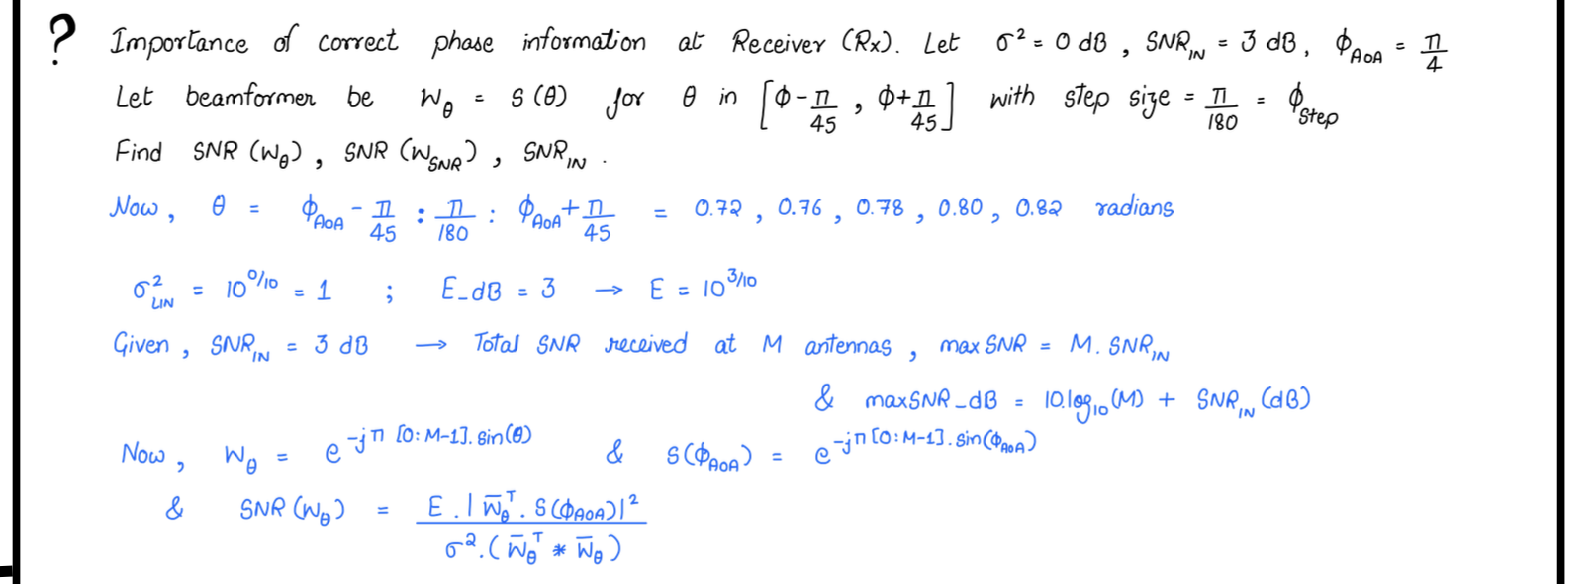

/tmp/ipykernel_301611/4040276748.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  SNRmis[ii] = np.real(E * np.abs(np.dot(wmis.conj().T, s))**2) / (sigmasq * np.real(np.dot(wmis.conj().T, wmis)))


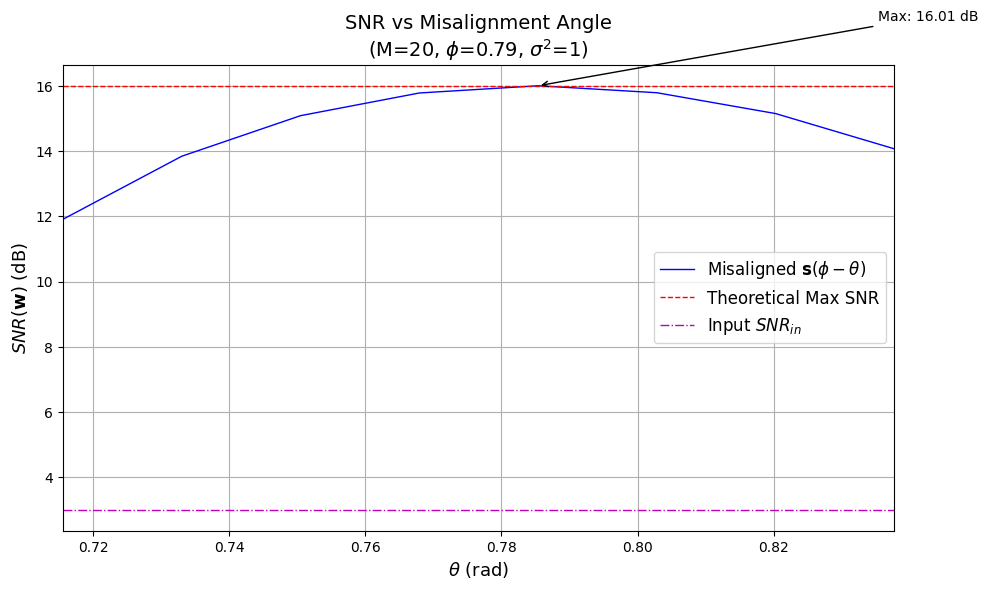

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
phi = np.pi / 4  # Steering angle in radians
pstep = np.pi / 180  # Step size for misalignment
paxis = phi + np.arange(-np.pi / 45, np.pi / 45, pstep)  # Misalignment range
M = 20  # Number of elements
sigmasq = 1  # Noise power
E_db = 3  # Energy in dB
E = 10 ** (E_db / 10)  # Linear energy
SNRin_db = 3  # Input SNR in dB
maxSNR_db = 10 * np.log10(M) + SNRin_db  # Theoretical max SNR
s = np.exp(-1j * np.pi * np.arange(M).reshape(-1, 1) * np.sin(phi))  # Steering vector

# Initialize SNR for misalignment
SNRmis = np.zeros(len(paxis))

# Calculate SNR for each misalignment angle
for ii, theta in enumerate(paxis):
    wmis = np.exp(-1j * np.pi * np.arange(M) * np.sin(theta))
    SNRmis[ii] = np.real(E * np.abs(np.dot(wmis.conj().T, s))**2) / (sigmasq * np.real(np.dot(wmis.conj().T, wmis)))

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(paxis, 10 * np.log10(SNRmis), 'b-', linewidth=1, label=r'Misaligned $\mathbf{s}(\phi - \theta)$')
plt.plot(paxis, maxSNR_db * np.ones(len(paxis)), '--r', linewidth=1, label='Theoretical Max SNR')
plt.plot(paxis, SNRin_db * np.ones(len(paxis)), '-.m', linewidth=1, label=r'Input $SNR_{in}$')

# Annotations
plt.annotate(f'Max: {maxSNR_db:.2f} dB', xy=(phi, maxSNR_db), 
             xytext=(phi + 0.05, maxSNR_db + 2),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# Plot Details
plt.legend(fontsize=12)
plt.xlabel(r'$\theta$ (rad)', fontsize=13)
plt.ylabel(r'$SNR(\mathbf{w})$ (dB)', fontsize=13)
plt.title(f'SNR vs Misalignment Angle\n(M={M}, $\phi$={phi:.2f}, $\sigma^2$={sigmasq})', fontsize=14)
plt.grid(True)
plt.xlim([min(paxis), max(paxis)])
plt.tight_layout()

# Save Figure
plt.savefig('HW1B_fig6_refined.png', dpi=300)
plt.show()

### Observation
- From the figure, we observe that estimating the exact AoA(Φ) is crucial to obtaining a high SNR post beamforming. 
Even small estimation error of Φ can affect the SNR significantly.
Eg., by just a mismatch of about 7.5 degrees, there is a reduction of SNR by 34 db.
